# Préprocessing simple et prémier modèle

In [182]:
import numpy as np
import pandas as pd

In [499]:
data = pd.read_excel("data/dataset.xlsx")

In [509]:
df = data.copy()
num_cols = df.select_dtypes(exclude='object').columns
objet_cols = df.select_dtypes(exclude=np.number).columns

In [510]:
# Je convertis en liste pour pouvoir faire un append des variables GAJ et COEUR
objet_cols = objet_cols.to_list()
objet_cols.append('GAJ')
objet_cols.append('CŒUR')
num_cols = num_cols.drop(['GAJ', 'CŒUR'])

In [511]:
df[objet_cols]

,SEXE,TDT,ECG,ANGINE,PENTE,GAJ,CŒUR
0,homme,AA,Normal,Non,Ascendant,0,0
1,femme,DNA,Normal,Non,Plat,0,1
2,homme,AA,ST,Non,Ascendant,0,0
3,femme,ASY,Normal,Oui,Plat,0,1
4,homme,DNA,Normal,Non,Ascendant,0,0
...,...,...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat,0,1
914,homme,ASY,Normal,Non,Plat,1,1
915,homme,ASY,Normal,Oui,Plat,0,1
916,femme,AA,LVH,Non,Plat,0,1


In [512]:
df[num_cols]

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [513]:
for col in objet_cols:
    mod = df[col].unique()
    print(f"{col}\n{mod}")
    print(f"{df[col].value_counts()}\n\n")

SEXE
['homme' 'femme']
homme    725
femme    193
Name: SEXE, dtype: int64


TDT
['AA' 'DNA' 'ASY' 'AT']
ASY    496
DNA    203
AA     173
AT      46
Name: TDT, dtype: int64


ECG
['Normal' 'ST' 'LVH']
Normal    552
LVH       188
ST        178
Name: ECG, dtype: int64


ANGINE
['Non' 'Oui']
Non    547
Oui    371
Name: ANGINE, dtype: int64


PENTE
['Ascendant' 'Plat' 'Descendant']
Plat          460
Ascendant     395
Descendant     63
Name: PENTE, dtype: int64


GAJ
[0 1]
0    704
1    214
Name: GAJ, dtype: int64


CŒUR
[0 1]
1    508
0    410
Name: CŒUR, dtype: int64




In [514]:
df.duplicated().sum()

0

In [515]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [524]:
def encodeNominale(variable_list):
    
#     duming = []
    # on définit l’objet
    encoder_area = OneHotEncoder(sparse=False, categories="auto")
     
    for index, var in enumerate(variable_list):
        # Recherche de la modalité ayant le plus petit nombre de d'individus
        sup = df[var].value_counts() == df[var].value_counts().min()
        sup = sup.sort_values(ascending=False)
        # Obtenttion du nom tel que enregistrer dans le dataframe
        mod_sup = sup.index[0]
        
        
        # on crée un array dans lequel on stocke le résultat
        area = encoder_area.fit_transform(np.array(df[var]).reshape(-1, 1))
        
        if index == 0:
            # on définit un DataFrame nettoyé qui consiste en la concaténation du
            # DataFrame initial et des nouvelles colonnes
            colums = df[var].sort_values().unique()
            churn_clean = pd.concat([df, pd.DataFrame(area,columns=colums,
                                                       index=df.index)], axis=1)
        else:
            # on définit un DataFrame nettoyé qui consiste en la concaténation du
            # DataFrame initial et des nouvelles colonnes
            colums = churn_clean[var].sort_values().unique()
            churn_clean = pd.concat([churn_clean, pd.DataFrame(area,columns=colums,
                                                       index=churn_clean.index)], axis=1)

        # on supprime la colonne initiale et la modalité ayant le plus petit nombre de d'individus
        churn_clean.drop([var, mod_sup], axis=1, inplace=True)
        
    return churn_clean

In [525]:
df_ = encodeNominale(['TDT', 'ECG', 'PENTE'])
df_

,AGE,SEXE,PAR,CHOLESTEROL,GAJ,FCMAX,ANGINE,DEPRESSION,CŒUR,AA,ASY,DNA,LVH,Normal,Ascendant,Plat
0,40,1,140,289,0,172,0,0.0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,49,0,160,180,0,156,0,1.0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,37,1,130,283,0,98,0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,48,0,138,214,0,108,1,1.5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,54,1,150,195,0,122,0,0.0,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0
914,68,1,144,193,1,141,0,3.4,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
915,57,1,130,131,0,115,1,1.2,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
916,57,0,130,236,0,174,0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [526]:
#fonction d'encodage des variables qualitatives
def encodeMod2(dataframe):
    dataframe['SEXE'].replace({'femme': 0, 'homme': 1}, inplace=True)
    dataframe['ANGINE'].replace({'Oui': 1, 'Non': 0}, inplace=True)
    return dataframe

In [527]:
df_ = encodeMod2(df_)
df_

,AGE,SEXE,PAR,CHOLESTEROL,GAJ,FCMAX,ANGINE,DEPRESSION,CŒUR,AA,ASY,DNA,LVH,Normal,Ascendant,Plat
0,40,1,140,289,0,172,0,0.0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,49,0,160,180,0,156,0,1.0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,37,1,130,283,0,98,0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,48,0,138,214,0,108,1,1.5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,54,1,150,195,0,122,0,0.0,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0
914,68,1,144,193,1,141,0,3.4,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
915,57,1,130,131,0,115,1,1.2,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
916,57,0,130,236,0,174,0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [528]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 

In [529]:
numeric_transformer = StandardScaler()
df_[num_cols] = numeric_transformer.fit_transform(df_[num_cols])
df_

,AGE,SEXE,PAR,CHOLESTEROL,GAJ,FCMAX,ANGINE,DEPRESSION,CŒUR,AA,ASY,DNA,LVH,Normal,Ascendant,Plat
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,-0.832432,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,0.105664,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,-0.832432,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,0.574711,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,-0.832432,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.210356,0.596393,0,-0.188999,0,0.293283,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0
914,1.536902,1,0.627078,-0.053049,1,0.164684,0,2.357094,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
915,0.370100,1,-0.129513,-0.620168,0,-0.857069,1,0.293283,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
916,0.370100,0,-0.129513,0.340275,0,1.461525,0,-0.832432,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [530]:
x = df_.drop('CŒUR', axis=1)
df_.to_csv('data/df_norm.csv', index=False)
y = df_['CŒUR']

## Prémier modèle

In [531]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [532]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [533]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

In [546]:
# on peut afficher les coefficients du modèle :
pd.DataFrame(logistic.coef_, columns=x_train.columns)

,AGE,SEXE,PAR,CHOLESTEROL,GAJ,FCMAX,ANGINE,DEPRESSION,AA,ASY,DNA,LVH,Normal,Ascendant,Plat
0,0.060094,0.990956,0.071254,-0.396095,1.146425,-0.279512,0.735133,0.526257,-0.757175,0.974854,-0.495619,0.216611,0.144963,-0.899867,1.225556


Les variable ayant un coéfficient positif sont les potentiels facteurs de risque

### Odds Ratios

In [547]:
odds_ratio = np.exp(logistic.coef_)
x_col = pd.DataFrame(odds_ratio, columns=x_train.columns)
x_col

,AGE,SEXE,PAR,CHOLESTEROL,GAJ,FCMAX,ANGINE,DEPRESSION,AA,ASY,DNA,LVH,Normal,Ascendant,Plat
0,1.061936,2.693809,1.073854,0.672943,3.146922,0.756152,2.08576,1.692584,0.46899,2.65078,0.609194,1.241861,1.155997,0.406624,3.406058


In [548]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=logistic, 
                 cv=10, 
                 scoring='neg_mean_squared_error')
selector.fit(x_train, y_train)
print("Nombre optimal de caractéristiques: %d" 
      % selector.n_features_)

Nombre optimal de caractéristiques: 11


In [549]:
print("Variables les plus importantes pour la régression logistique")
feature_inportants = x_col.columns[selector.support_]
feature_inportants

Variables les plus importantes pour la régression logistique


Index(['SEXE', 'CHOLESTEROL', 'GAJ', 'FCMAX', 'ANGINE', 'DEPRESSION', 'AA',
       'ASY', 'DNA', 'Ascendant', 'Plat'],
      dtype='object')

In [550]:
# on prédit grâce à ce modèle
y_predict = logistic.predict(x_test)

In [551]:
print("Rapport pour le modèle Logistique :",
      classification_report(y_test, y_predict, target_names=['Abscence', 'Présence']) ,sep="\n")
matrix = confusion_matrix(y_test, y_predict)
pd.DataFrame(matrix)

Rapport pour le modèle Logistique :
              precision    recall  f1-score   support

    Abscence       0.84      0.88      0.86        77
    Présence       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



,0,1
0,68,9
1,13,94


Ici nous allons utiliser la précision comme métrique.

La précision étant la probabilité que le modèle prédise un malade quand celui-ci est malade.

Vu que les classe ne sont pas désiquilibrées on aurait pu utilisé accuracy comme métriques

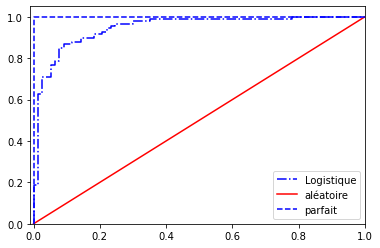

In [552]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve

# on extrait les probabilités d'appartenance
proba_ped = logistic.predict_proba(x_test)[:,1]

# cas du modèle RF
fpr, tpr, _ = roc_curve(y_test, proba_ped)
plt.plot(fpr,tpr,"b-.", label="Logistique")

# modèle aléatoire
plt.plot([0, 1], [0, 1],"r-", label="aléatoire", )

# modèle parfait
plt.plot([0,0, 1], [0,1, 1], 'b--', label="parfait")

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [554]:
from sklearn.metrics import roc_auc_score
auc_modele = roc_auc_score(y_test, logistic.predict_proba(x_test)[:,1])

print("Aire sous la courbe ROC pour le modèle logistique :" , auc_modele)

Aire sous la courbe ROC pour le modèle logistique : 0.9473237043330501


La courbe nous nous montre la qualité de notre modèle qui se rapproche du modèle parfait

## Second modèle utilisant les sept variables retenues

In [555]:
x = df_[feature_inportants]
# x.drop('CHOLESTEROL', axis=1, inplace=True)

In [556]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [557]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

### Odds Ratios

In [558]:
odds_ratio = np.exp(logistic.coef_)
x_col = pd.DataFrame(odds_ratio, columns=x.columns)
x_col

,SEXE,CHOLESTEROL,GAJ,FCMAX,ANGINE,DEPRESSION,AA,ASY,DNA,Ascendant,Plat
0,3.636489,0.622108,2.813252,0.893266,2.50186,1.532591,0.579581,3.212089,0.791269,0.36692,3.221262


In [559]:
# on prédit grâce à ce modèle
y_predict = logistic.predict(x_test)

In [560]:
print("Rapport pour le modèle Logistique :",
      classification_report(y_test, y_predict, target_names=['Abscence', 'Présence']) ,sep="\n")
matrix = confusion_matrix(y_test, y_predict)
pd.DataFrame(matrix)

Rapport pour le modèle Logistique :
              precision    recall  f1-score   support

    Abscence       0.93      0.88      0.91        78
    Présence       0.92      0.95      0.94       106

    accuracy                           0.92       184
   macro avg       0.93      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



,0,1
0,69,9
1,5,101


**Après la selection de variable le modèle est encore plus performant**

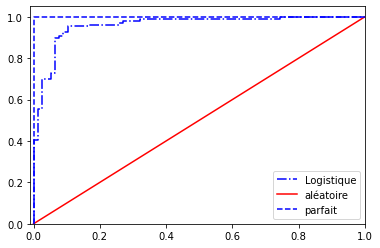

In [561]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve

# on extrait les probabilités d'appartenance
proba_ped = logistic.predict_proba(x_test)[:,1]

# cas du modèle RF
fpr, tpr, _ = roc_curve(y_test, proba_ped)
plt.plot(fpr,tpr,"b-.", label="Logistique")

# modèle aléatoire
plt.plot([0, 1], [0, 1],"r-", label="aléatoire", )

# modèle parfait
plt.plot([0,0, 1], [0,1, 1], 'b--', label="parfait")

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [562]:
from sklearn.metrics import roc_auc_score
auc_modele = roc_auc_score(y_test, logistic.predict_proba(x_test)[:,1])

print("Aire sous la courbe ROC pour le modèle logistique :" , auc_modele)

Aire sous la courbe ROC pour le modèle logistique : 0.9602080309627479
